<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-48/blob/main/Reto/Entrega2/Reto_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
- Explora que clasificador es el más optimo, ejemplo:
  - Decision trees
  - Random Forest.
- Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.
- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
- Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y




# Elegir una base de datos, ya sea la de aguas superficiales o la de aguas subterráneas.

El dataset a utilizar es el de aguas subterráneas, dado que presenta una mayor cantidad de datos diferentes a **NaN** en comparación al dataset de aguas superficiales, lo que nos puede ayudar para tener mejores predicciones, a la hora de usar modelos de machine learning.



# Limpieza de base de datos

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

file="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-48/main/Reto/Entrega1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
dfsw=pd.read_csv(file,encoding = "ISO-8859-1")

In [2]:
pd.set_option("display.max_columns",None) #mostramos todas las columnas
dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Eliminamos el signo ${<}$ de todas las variables ordinales por motivos de practicidad

In [3]:
to_numeric=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in to_numeric:
  dfsw[i] = dfsw[i].astype("str")
  dfsw[i] = dfsw[i].str.replace("<","0")
  dfsw[i]= dfsw[i].astype("float")

Verificamos cuantos datos vacíos tiene nuestro dataframe

In [4]:
dfsw.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

Usames el siguiente bloque de codigo para conocer la cantidad de diferentes valores que cada columna contiene. Despues clasificarmos la forma en como seran tratados los datos nulos por columna , agregando el nombre de la columna las listas "fill_moda" o "fill_mediana".

In [5]:
fill_moda = ["CALIDAD_ALC","CALIDAD_SDT_ra","CALIDAD_SDT_salin","CALIDAD_N_NO3","CALIDAD_DUR","CONTAMINANTES","CALIDAD_CONDUC"]
fill_mediana = ["CONDUCT_mS/cm","ALC_mg/L","SDT_M_mg/L","N_NO3_mg/L","DUR_mg/L"]
dropna = ["SDT_mg/L"]

Remplazamos por moda

In [6]:
for c in fill_moda:
  dfsw[c].fillna(dfsw[c].mode()[0], inplace=True)

Remplazamos por mediana

In [7]:
for c in fill_mediana:
  dfsw[c].fillna(dfsw[c].median(), inplace=True)

Mostramos la longitud del dataset

In [8]:
len(dfsw)

1068

Como se puede apreciar la columna SDT_mg/L se encuentra vacía en su totalidad, por lo cual se procederá a eliminarla

Usamos el método drop para eliminar la columna con valores vacíos

In [9]:
dfsw.drop("SDT_mg/L",axis=1,inplace=True)

Verificamos que ya no exitan datos nulos en el dataset

In [10]:
dfsw.isnull().sum().sort_values(ascending=False)

CLAVE                   0
SITIO                   0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CR_TOT_mg/L             0
CALIDAD_CD              0
CD_TOT_mg/L             0
CALIDAD_CONDUC          0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO     

Como sabemos muchos modelos no toman en cuenta strings como entrada, es por esto que podemos encodificar estas variables con 0 y 1 mediante el metodo get_dummies() para convertir variables categoricas en dummy variables.

In [11]:
dfsw["CONTAMINANTES"].value_counts()

FLUO,                                            512
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
AS,                                               31
                                                ... 
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,                1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 126, dtype: int64

In [12]:
dftmp = dfsw["CONTAMINANTES"].str.get_dummies(sep=',')
clean_dfsw = pd.concat([dfsw,dftmp], axis=1)
clean_dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Eliminamos la columna contaminantes, ya que la hemos convertido en columnas dummy

In [13]:
clean_dfsw.drop("CONTAMINANTES",axis=1,inplace=True)

Usamos los datos ya limpios

In [14]:
df = clean_dfsw.copy()

Visualizamos como quedo el dataframe

In [15]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Ahora seleccionamos las columnas que nos van a servir para el modelo, dado que algunas columnas son redundantes y no aportan más información

In [16]:
columns=["SITIO","ORGANISMO_DE_CUENCA","ESTADO","MUNICIPIO","ACUIFERO","SUBTIPO","LONGITUD","LATITUD","CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE","ALC","AS","CD","CF",
         "CONDUC",	"CR"	,"DT","FE","FLUO","HG","MN","NI","NO3","PB","SDT_ra","SDT_salin","SEMAFORO"]

Creamos nuestro nuevo dataframe con las columnas deseadas

In [17]:
df=df[columns]

In [18]:
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin,SEMAFORO
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Verde
1,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Verde
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Rojo
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Verde
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Rojo


# Selecciona tus variables independientes X y dependiente Y (semáforo)

In [19]:
X=df.iloc[:,:-1:] #variables predictoras
y=df.iloc[:,-1] #variable objetivo

Creamos los pipelines

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler


categorical_features =["SITIO","ORGANISMO_DE_CUENCA"	,"ESTADO",	"MUNICIPIO","ACUIFERO",	"SUBTIPO"]
categorical_pipeline=Pipeline(
    steps=[("OHEcat",OneHotEncoder(handle_unknown="ignore"))]
)

binary_features=["CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE"]
binary_pipeline=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)       

columnasTransformer = ColumnTransformer(transformers = [('catpipe', categorical_pipeline, categorical_features),
                                                        ('binpipe', binary_pipeline, binary_features)])

# Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [21]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(y)
y_label=le.transform(y)



# Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [22]:
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier()
pipeline = Pipeline(steps=[('ct',columnasTransformer),('dt',decision_tree)])
pipeline.fit(X,y_label)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('catpipe',
                                                  Pipeline(steps=[('OHEcat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SITIO',
                                                   'ORGANISMO_DE_CUENCA',
                                                   'ESTADO', 'MUNICIPIO',
                                                   'ACUIFERO', 'SUBTIPO']),
                                                 ('binpipe',
                                                  Pipeline(steps=[('OHEbi',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                                   'CUMPLE_

Feature: SITIO               , Score: 0.00094
Feature: ORGANISMO_DE_CUENCA , Score: 0.00000
Feature: ESTADO              , Score: 0.00000
Feature: MUNICIPIO           , Score: 0.00103
Feature: ACUIFERO            , Score: 0.00253
Feature: SUBTIPO             , Score: 0.00000
Feature: LONGITUD            , Score: 0.00000
Feature: LATITUD             , Score: 0.00000
Feature: CUMPLE_CON_ALC      , Score: 0.02903
Feature: CUMPLE_CON_COND     , Score: 0.05927
Feature: CUMPLE_CON_SDT_ra   , Score: 0.00000
Feature: CUMPLE_CON_SDT_salin, Score: 0.00000
Feature: CUMPLE_CON_FLUO     , Score: 0.20103
Feature: CUMPLE_CON_DUR      , Score: 0.14213
Feature: CUMPLE_CON_CF       , Score: 0.08155
Feature: CUMPLE_CON_NO3      , Score: 0.10468
Feature: CUMPLE_CON_AS       , Score: 0.11910
Feature: CUMPLE_CON_CD       , Score: 0.00103
Feature: CUMPLE_CON_CR       , Score: 0.01929
Feature: CUMPLE_CON_HG       , Score: 0.00000
Feature: CUMPLE_CON_PB       , Score: 0.01170
Feature: CUMPLE_CON_MN       , Sco

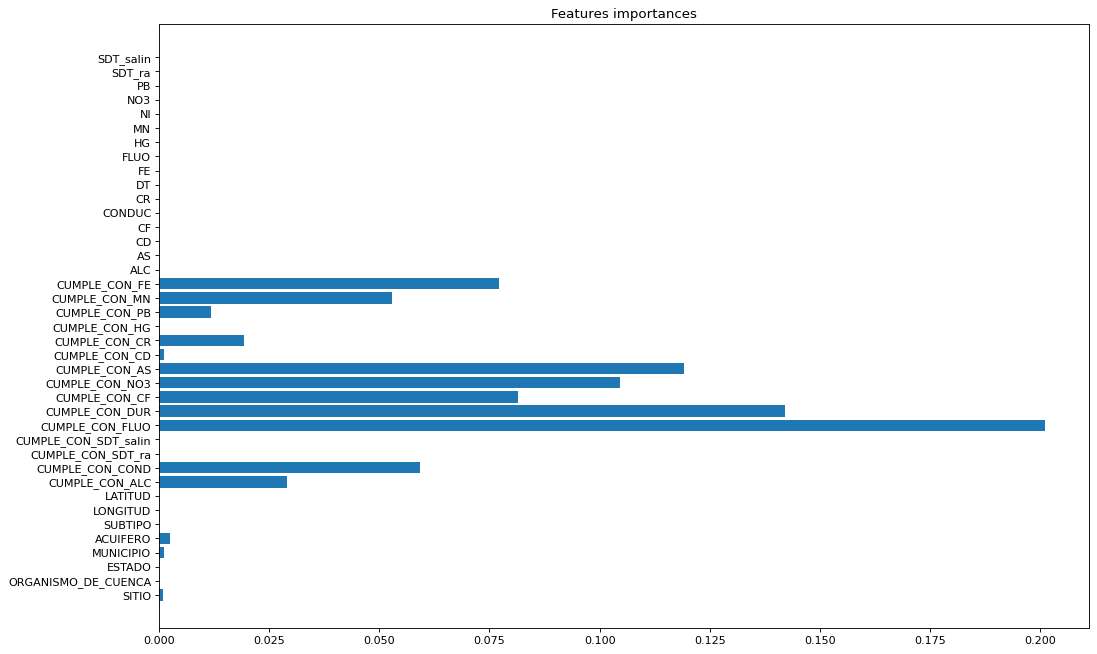

In [23]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

importance = permutation_importance(pipeline, X, y_label, n_repeats=10,random_state=1)

figure(figsize = (15, 10), dpi = 80)

for v,n in zip(importance['importances_mean'], list(X.columns)):
	print('Feature: {0:20}, Score: {1:.5f}'.format(n,v))
plt.title("Features importances")
plt.barh(X.columns.to_numpy(),importance["importances_mean"])
plt.show()

# Selecciona las variables de mayor importancia.

In [24]:
most_important=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
df=df[most_important]

Creamos otro pipeline con las variables más importantes

In [25]:
binary_features=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
bin_pipe=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)  

important_features = ColumnTransformer(transformers = [('binpipe', bin_pipe, binary_features)])



Asignamos a **X** las columnas más importantes sacadas con feature importance, la **y** ya la tenemos en la parte de arriba como **y_label**

In [26]:
X=df

In [27]:
X.head()

,CUMPLE_CON_FE,CUMPLE_CON_MN,CUMPLE_CON_PB,CUMPLE_CON_CR,CUMPLE_CON_AS,CUMPLE_CON_NO3,CUMPLE_CON_CF,CUMPLE_CON_DUR,CUMPLE_CON_FLUO,CUMPLE_CON_COND,CUMPLE_CON_ALC
0,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI
3,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI


## Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_label,test_size=0.3,random_state=1,stratify=y_label) #stratify lo usamos para dividir los datos balanceados

# Explora que clasificador es el más optimo, ejemplo:
* Decision trees
* Random forest

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



def get_models(): #creamos una función donde guardamos el modelo y el nombre del modelo
  modelos = list()
  nombres = list()

  # RF - Bosque Aleatorio
  modelos.append(RandomForestClassifier())

  #DT - Decision Tree
  modelos.append(DecisionTreeClassifier(random_state=0, max_depth=5))

  return modelos

In [66]:
modelos=get_models()

Evaluamos nuestro modelo con Random Forest

In [67]:
pipeline = Pipeline(steps=[('ct',important_features),('m',modelos[0])])
pipeline.fit(X_train,y_train)
yhat=pipeline.predict(X_test)

In [68]:

from sklearn.metrics import precision_score, recall_score

precision=precision_score(y_test, yhat, average='macro')
recall=recall_score(y_test,yhat,average="macro")
print("La precision es de:",precision)
print("El recall es de:",recall)

La precision es de: 0.9789029535864979
El recall es de: 0.985632183908046


Evaluamos nuestro modelo con Decision Tree

In [69]:
pipeline = Pipeline(steps=[('ct',important_features),('m',modelos[1])])
pipeline.fit(X_train,y_train)
yhat=pipeline.predict(X_test)

La precision es de: 0.8824217787632422
El recall es de: 0.8470798384591488


[Text(0.6071428571428571, 0.9166666666666666, 'X[17] <= 0.5\ngini = 0.65\nsamples = 747\nvalue = [173, 271, 303]'),
 Text(0.5357142857142857, 0.75, 'X[15] <= 0.5\ngini = 0.626\nsamples = 613\nvalue = [173, 137, 303]'),
 Text(0.35714285714285715, 0.5833333333333334, 'X[0] <= 0.5\ngini = 0.514\nsamples = 466\nvalue = [65, 98, 303]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.42\nsamples = 413\nvalue = [31, 79, 303]'),
 Text(0.14285714285714285, 0.25, 'X[11] <= 0.5\ngini = 0.359\nsamples = 386\nvalue = [31, 52, 303]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.286\nsamples = 362\nvalue = [31, 28, 303]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.5, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.46\nsamples = 53\nvalue = [34, 19, 0]'),
 Text(0.42857142857142855, 0.25, 'X[6] <= 0.5\ngini = 0.386\nsamples = 46\

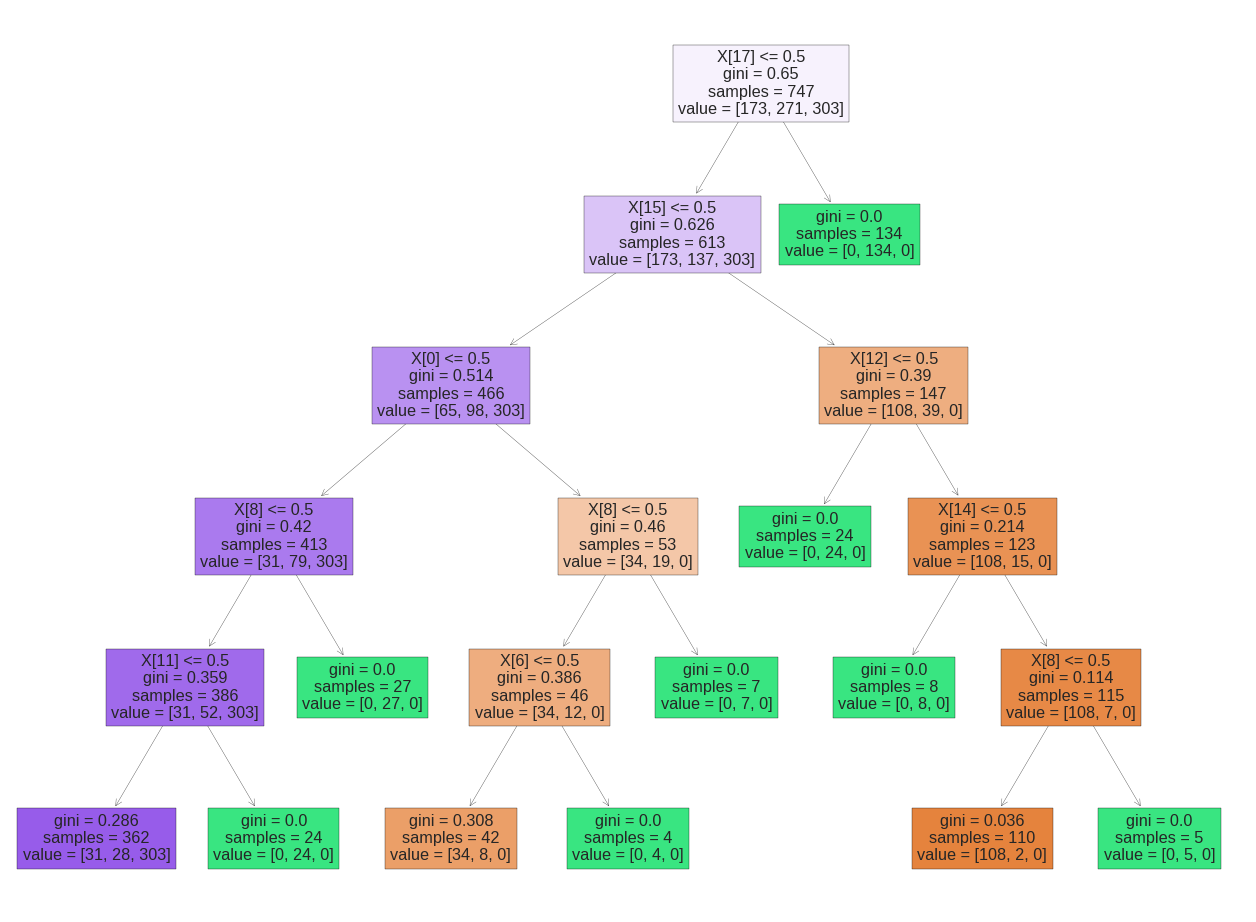

In [70]:
from sklearn.metrics import precision_score, recall_score

precision=precision_score(y_test, yhat, average='macro')
recall=recall_score(y_test,yhat,average="macro")
print("La precision es de:",precision)
print("El recall es de:",recall)
figure(figsize = (20, 15), dpi = 80)

tree.plot_tree(pipeline.named_steps["m"], filled = True)


# Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.


Primero hacemos el classification report

In [71]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.76      0.80        74
     class 1       1.00      0.78      0.88       116
     class 2       0.80      1.00      0.89       131

    accuracy                           0.87       321
   macro avg       0.88      0.85      0.86       321
weighted avg       0.88      0.87      0.86       321



Después la gráfica de Precision-Recall

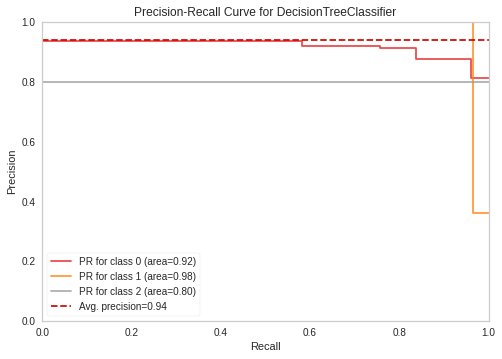

In [73]:
from yellowbrick.classifier import PrecisionRecallCurve
prcurve = PrecisionRecallCurve(
    pipeline,
    per_class=True,
    cmap="Set1"
)
prcurve.fit(X_train, y_train)
prcurve.score(X_test, y_test)
prcurve.show()